In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t  # значения t статистики и нормального расределения
sns.set()

<h1 style = "text-align : center"> Курсовой проект по предмету: <br>"Теория вероятностей и математическая статистика" <br> по теме:  "Разведочный анализ данных <br> из набора сведений о держателях кредитных карт банка"</h1> <hr>
<h3> Основные цели проекта:
<ol> <li> Провести разведочный анализ данных набора (EDA). </li> 
<li> Выявить статистические взаимосвязи между метриками определить, их влияние на вероятность отказа потребителя от кредитной карты. </li> 
<li>*В случае, если приведенный набор метрик позволяет выделить из генеральной совокупности подмножества клиентов, которые с достоверной вероятностью откажутся от кредитной карты, определить признаки для построения модели. </li> 
<li> *Построить классификатор клиентов на базе одной из моделей структурированного машинного обучения: <ul> <li> Классификатора на основе линейной регрессии </li> <li> Классификатора на основе машины опорных векторов </li> </ul> </li>
<li> *Определить из них более подходящий.</li> </ol> </h3>

<h1 style= "text-align: center"> Описание набора данных </h1>
<p> <a href = "https://www.kaggle.com/sakshigoyal7/credit-card-customers " target = "_blank"> Ссылка на набор (Kaggle.com) </a></p> 

<h2 style= "text-align: center"> Описание от автора набора </h2>
<p> A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction. <br>

I got this dataset from a website with the URL as https://leaps.analyttica.com/home. I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem. 
Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features. <br>

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.  </p>

<h2 style= "text-align: center"> Машинный перевод авторского описания </h2>
<p> Менеджмент банка обеспокоен тем, что все больше и больше клиентов отказываются от обслуживания кредитной карты. Менеджеры были бы очень признательны, если бы для них можно было предсказать, отказ клиента, чтобы они могли заранее обратиться к клиенту, чтобы предоставить ему более качественные услуги и повернуть решения клиентов в противоположном направлении.<br>

Я получил этот набор данных с веб-сайта с URL-адресом https://leaps.analyttica.com/home. Я использую это некоторое время для получения наборов данных и, соответственно, работаю над ними для получения плодотворных результатов. На сайте объясняется, как решить ту или иную бизнес-задачу.
Теперь этот набор данных состоит из 10 000 клиентов, указывающих свой возраст, зарплату, семейный_статус, лимит кредитной карты, категорию кредитной карты и т. Д. Есть около 18 характеристик.

У нас только 16,07% клиентов ушли. Таким образом, немного сложно обучить нашу модель прогнозированию оттока клиентов.</p>

In [0]:
link = "https://raw.githubusercontent.com/Segrey372017/GB_TP_TermPaper/main/BankChurners.csv" # набор данных загружен 
                                                                                             #   в репозиторий курсовой

In [0]:
data = pd.read_csv(link) # Создаем объект DataFrame и загружаем в него набор

In [0]:
data.head(10) # первые 10 записей набора

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [0]:
# мощность набора
sh = data.shape  
print(f'Число записей в наборе {sh[0]}, чило признаков (колонок) {sh[1]}')

Число записей в наборе 10127, чило признаков (колонок) 23


In [0]:
# Посмотрим наименования всех колонок
print(data.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


<table> <caption> <h3> Описание характеристик набора </h3> </caption> 
<tr> <td> <b>Оригинальное название </b></td> <td> <b>Русское название </b></td> <td> <b>Описание, примечания </b> </td></tr>
<tr> <td> CLIENTNUM</td> <td> ID </td> <td> Порядковый номер клиента в базе данных </td></tr>
<tr> <td> Attrition_Flag</td> <td> СтатусКлиента </td> <td> Является ли действующим клиентом банка </td></tr>
<tr> <td> Customer_Age</td> <td> ВозрастКлиента </td> <td> Возраст, лет </td></tr>
<tr> <td> Gender</td> <td> ПолКлиента </td> <td> Пол Male(М) - мужской, Female(F) - женский</td></tr>
<tr> <td> Dependent_count</td> <td> ЧислоИждивенцев </td> <td> Количество членов семьи на иждивении</td></tr>
<tr> <td> Education_Level</td> <td> УровеньОбразования </td> <td> Уровень образования</td></tr>
<tr> <td> Marital_Status</td> <td> Брачность </td> <td> Состоит ли клиент в браке</td></tr>
<tr> <td> Income_Category</td> <td> УровеньДохода </td> <td> Отношения клиента к группе по уровню дохода</td></tr>
<tr> <td> Card_Category</td> <td> ВидКарты </td> <td> Категория кредитной карты (кредитный продукт)</td></tr>
<tr> <td> Months_on_book</td> <td> КлиентскийСтаж </td> <td> Сколько месяцев является клиентом банка</td></tr>
<tr> <td> Total_Relationship_Count</td> <td> КолПродуктов </td> <td> Сколько видов продуктов банка использует клиент</td></tr>
<tr> <td> Months_Inactive_12_mon</td> <td> МесНеактив12 </td> <td> Число месяцев неактивности клиента (не совершал операций) за последние 12 месяцев </td> </tr> 
<tr> <td> Contacts_Count_12_mon</td> <td> КолКонтактов12 </td> <td> Кол-во контактов с банком в течение последних 12 месяцев</td></tr>
<tr> <td> Credit_Limit</td> <td> КредитныйЛимит </td> <td> Лимит по кредитной карте</td></tr>
<tr> <td> Total_Revolving_Bal</td> <td> ВозобнОстаток</td> <td> Общий возобновляемый остаток на кредитной карте</td></tr>
<tr> <td> Avg_Open_To_Buy</td> <td> ОткрытаяЛиния</td> <td> Открытая к использованию кредитная линия на покупки по карте в среднем за последние 12 месяцев</td></tr>
<tr> <td> Total_Amt_Chng_Q4_Q1</td> <td> ИзмТразакции </td> <td> Изменение средней транзакции 4Квартала-1Квартал</td></tr>
<tr> <td> Total_Trans_Amt</td> <td> ОборотКарты </td> <td> Оборот по карте за последние 12 месяцев</td></tr>
<tr> <td> Total_Trans_Ct</td> <td> ЧислоТранзакций </td> <td> Число операций по карте за последние 12 месяцев</td></tr>
<tr> <td> Total_Ct_Chng_Q4_Q1</td> <td> ИзмЧислаТранзакций </td> <td> Изменение количества транзакций 4квартал/1квартал</td></tr>
<tr> <td> Avg_Utilization_Ratio</td> <td> КоэфИспКарты </td> <td> Коэффициент использования карты</td></tr>
<tr> <td> Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1</td> <td> БайесВер1 </td> <td> Вероятность, что клиент откажется от карты (1классификатор)</td></tr>
<tr> <td> Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2</td> <td> БайесВер2  </td> <td> Вероятность, что клиент откажется от карты (2классификатор)</td></tr>
</table>

<h2 style = "text-align: center"> 1. Разведочный анализ данных </h2>

In [0]:
# очистка данных, удалим из набора строки с пропущенными значениями (если есть), набор данных достаточно большой, поэтому 
# считаем, что частью неполных данных можно пожертвовать
#data =  data.dropna(axis = 0) # удаляем строки с пропусками

In [0]:
data.shape # проверим количество оставшихся данных

(10127, 23)

In [0]:
# наборе пропусков нет, помечу код очистки как комментарий чтобы не выполнялся при перезапуске блокнота

In [0]:
# набор состоит зи качественных (пол клиента, группа клиента по уровень дохода) и колличественных (возраст, лимит по карте)
# характеристик. 
# Целесообразно исключить из исследования столбцы с номером клиента и результатами классификаторов
num_feat = np.array(['Customer_Age','Dependent_count', 'Months_on_book','Total_Relationship_Count', 'Months_Inactive_12_mon',
        'Contacts_Count_12_mon','Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']) # столбцы с колличественными характеристиками
cat_feat = np.array(['Attrition_Flag',  'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']) # столбцы с качественными характеристиками

print(f"Таким образом, для анализа доступны {len(num_feat)} количественных и \n {len(cat_feat)} качественных характеристик ")
#В свою очередь, автор набора говорил о 18 характеристиках, при этом на kagle тоже 23 колонки

Таким образом, для анализа доступны 14 количественных и 
 6 качественных характеристик 


<h3 style = "text-align: center"> 1.1. Анализ колличественных характеристик </h3>

In [0]:
num_data = data[num_feat] # выделим количественные характеристики в отдельный набор
num_data.head() # просмотрим первые 5 записей

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [0]:
num_data.describe() # минимальная описательная статистика для колличественных характеристик

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


<h3> Выводы: </h3>
<p> Количественные характеристики датасета имеют значительные различия между собой, это разные по масштабу и вариативности данные.
Для построения предиктивной модели надо будет выполнить нормализацию признаков, т.е. привести к 0 среднему и 1 стандартному отклонению </p>

In [0]:
#рассчитаем матрицу корреляции между колличественными характеристиками
c_mat = num_data.corr()

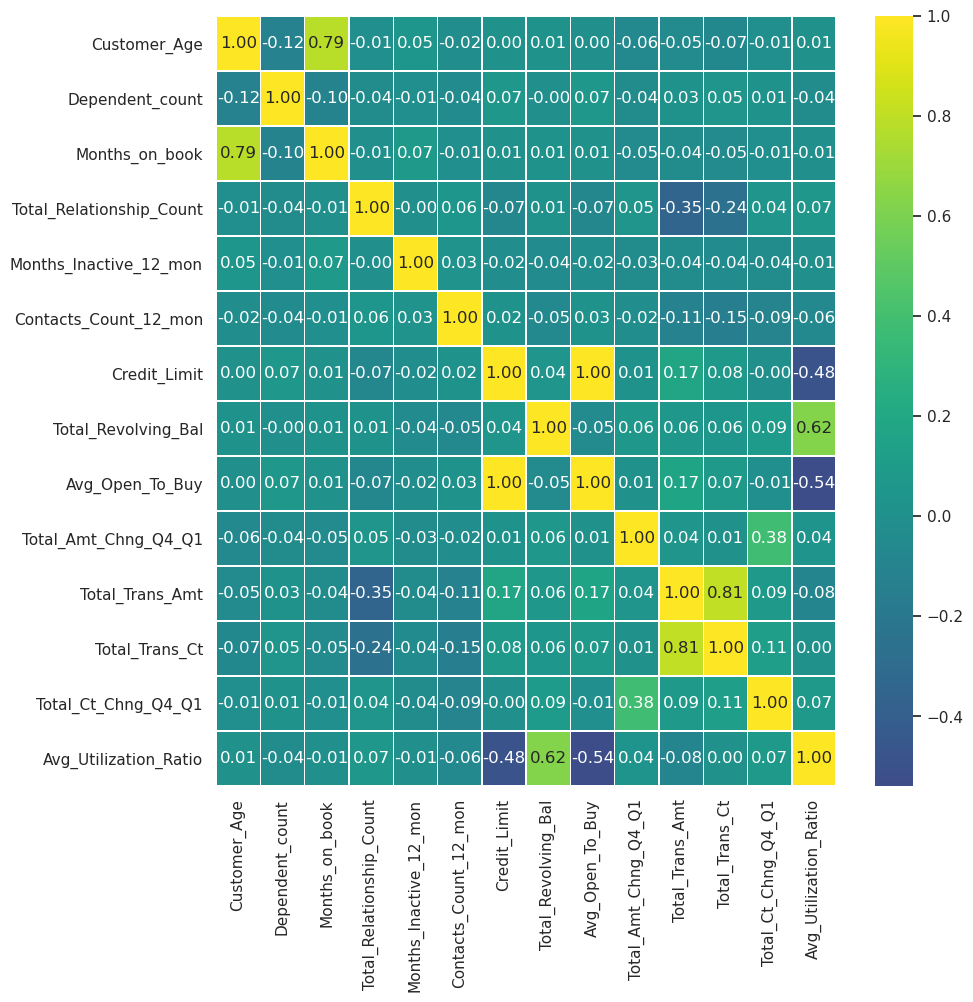

In [0]:
# визуализируем корреляцию между признаками с помощью тепловой карты
plt.figure(figsize=(10,10))
sns.heatmap(c_mat, annot= True, fmt= '.2f', cmap = 'viridis', linewidths= 0.3, center = 0.0)

<h3> Выводы</h3>
<p> <ul> 
<li> Сильная корреляция наблюдается между двумя признаками Customer_Age и Months_on_book, что в полне логичной - чем больше у человека возраст, тем вероятнее дольше он является клиентом банка </li>
<li> Также значимая положительная корреляция имеется для пары Total_Revolving_Bal и Avg_Utilization_Ratio, обе метрики характеризуют интенсивность использования карты. Возможно пригодятся при отборе признаков </li>
<li> Слабая отрицательная корреляция присутствует между Avg_Utilization_Ratio,  Credit_Limit, Avg_Open_To_Buy. Данная зависимость тоже логична, чем чаще используется карта тем ниже доступный кредитный лимит и доступный лимит для покупок. Возможно менеджменту банка следует как-то поощрять использование краты увеличивая кредитный лимит добросовесным клиентам, учитывая низкое значение тесноты связи возможно так и происходит  </li>
<li>Похоже в наборе есть спутанные признаки Total_Trans_Ct и Total_Trans_Amt оборот по карте за последние 12 месяцев логчино связан с числом транзакции за такой же период </li>
<li> В целом набор представлен слабо коррелирующими колличественными признаками, возможно между ними удасться найти нелинейные зависимости или разделимые множества, что облехчит задачу классификации по категориальным признакам  </li>
 </ul><p>

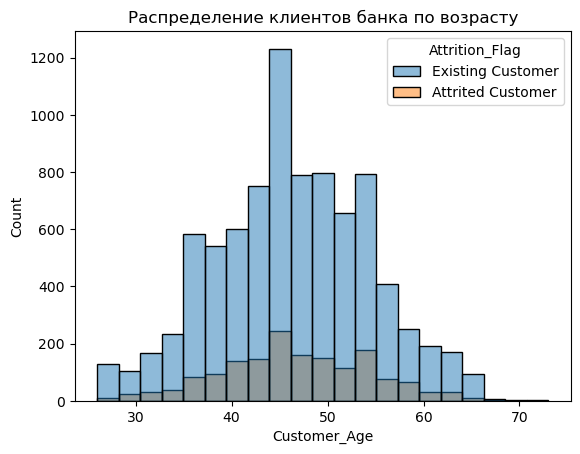

In [0]:
# Проанализируем распределения колличественных признаков, 
num_data['Attrition_Flag'] = data.Attrition_Flag # добавим для отображения метки ушедших клиентов

plt.title("Распределение клиентов банка по возрасту")
sns.histplot(num_data, x = 'Customer_Age', bins = 21, hue ='Attrition_Flag')

In [0]:
attr_index = num_data.index[num_data.Attrition_Flag.values == 'Attrited Customer'] # индексы отказавшихся клиентов
attr_age = num_data.Customer_Age.values[attr_index]
print("Выборочное среднее значение отказавшихся клиентов ", attr_age.mean())
print("Дисперсия выборки отказавшихся клиентов", attr_age.std()) # в выборке более 100 экземпляров можно применить смещенную оценку

def trust_interval(array, alpha = 0.05):
    """ Рассчитывает границы доверительного интверва для среднего значения из массива data (pd.Series)
    оценка точности по умолчанию  95% (alpha = 0.05). для оценки значимости применяется t - критерий"""
    ta = 1-alpha/2 # квантиль t распределения
    m = np.mean(array)
    n = len(array)
    T = t.ppf(ta,n-1) * np.std(array)/n**0.5 # граница интервала
    return f"Матожидание генеральной совокупности c вероятностью {(1-alpha)*100}% находится в интервале от  {m-T} до {m+T}"

print(trust_interval(num_data.Customer_Age.values))

Выборочное среднее значение отказавшихся клиентов  46.659496004917024
Дисперсия выборки отказавшихся клиентов 7.663295478760454
Матожидание генеральной совокупности c вероятностью 95.0% находится в интервале от  46.16981103125347 до 46.48210957702144


<p> Распределение клиентов банка по возрасту соответствует нормальному распределению, значительные выбросы отсутствуют. Наиболее частый воззраст клиента соответствует выборочному среднему арифметическому - т.е. примероно 46 годам. Данный возраст соответствут этапу карьерной зрелости клиента, когда он имеет максимальный доход и достигает пика карьеры. 
С точки зрения возраста, имеются статистически значимые различия множества отказавшихся клиентов, их средний возраст немного больше. Среднее значение возраста находится за пределами доверительного интервала генеральной совокупности клиентов банка<p>

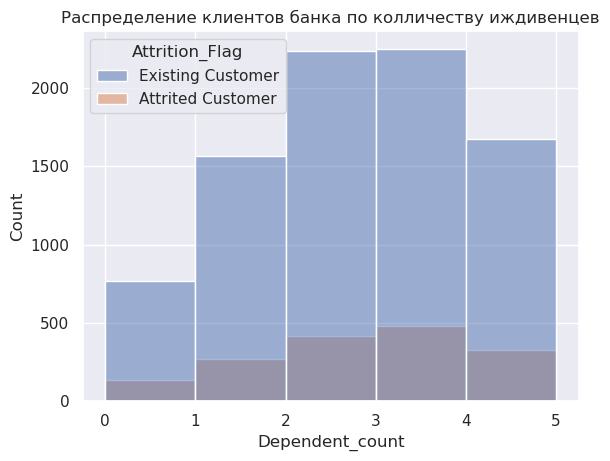

In [0]:
# распределение по количеству иждивенцев (зависимых членов семьи)
plt.title("Распределение клиентов банка по колличеству иждивенцев")
sns.histplot(num_data, x = 'Dependent_count', bins = 5, hue ='Attrition_Flag')

In [0]:
attr_index = num_data.index[num_data.Attrition_Flag.values == 'Attrited Customer'] # индексы отказавшихся клиентов
attr_dep = num_data.Dependent_count.values[attr_index]
print("Выборочное среднее значение отказавшихся клиентов ", attr_dep.mean())
print("Дисперсия выборки отказавшихся клиентов", attr_dep.std()) # в выборке более 100 экземпляров можно применить смещенную оценку

# Поскоульку в выборке наблюдается небольшое отличие среднего значения количества иждивенцев у отказавшихся клиентов. Возможно по этому признаку 
# есть возможность разделить совокуменость на два подмножества. За нулевую гипотезу примем, что выборочное среднее среднне отказавшихся клиентов 
# находится в доверительному интервале генеральному совокумености клинетов. Если нулевая гипотеза не подтвердится, то совокупность клиентов по данному
# признаку образует отдельное множество

print(trust_interval(num_data.Dependent_count.values))

Выборочное среднее значение отказавшихся клиентов  2.402581438229871
Дисперсия выборки отказавшихся клиентов 1.2746184596001395
Матожидание генеральной совокупности c вероятностью 95.0% находится в интервале от  2.3209034437450016 до 2.3715029944894215


Среднее значение количества иждивенцев у отказавшихся клинетов лежит вне доверительного интервала. Следовательно по данному признаку они образуют другую генеральную совокупность. Таким образом, данный признак будет возможно использовать для построения предиктивной модели. Автор набора данных также использовал даннй признак в модели.

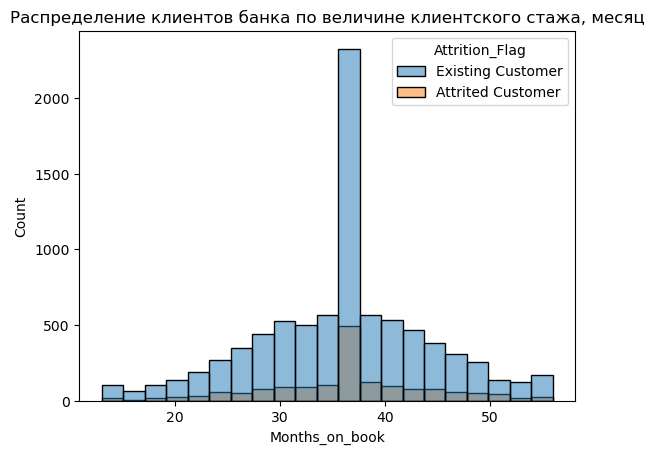

In [0]:
# распределение по длительности обслуживания в банке
plt.title("Распределение клиентов банка по величине клиентского стажа, месяц" )
sns.histplot(num_data, x = 'Months_on_book', bins = 21, hue ='Attrition_Flag')

In [0]:
#Проверим средние значения
print('Средний стаж обслуживания отказавшихся клиентов ', num_data.Months_on_book.values[attr_index].mean())
print('Ст. отклонение стажа обслуживания отказавшихся клиентов ', num_data.Months_on_book.values[attr_index].std())

print(trust_interval(num_data.Months_on_book.values))

Средний стаж обслуживания отказавшихся клиентов  36.178242163491085
Ст. отклонение стажа обслуживания отказавшихся клиентов  7.794152133594455
Матожидание генеральной совокупности c вероятностью 95.0% находится в интервале от  35.77285200821087 до 36.08396639802988


Более 75% клиентов имеют стаж обслуживания не более 40 месяцев, средний срок клинетского стажа состаляет 36 месяцев (3 года). Визуально отличий множества клиентов отказавшихся от услуг банка не наблюдается. Однако значение среднего по выборке отказавшихся клиентов находится за пределами доверительного интервала общей совокупности клиентов

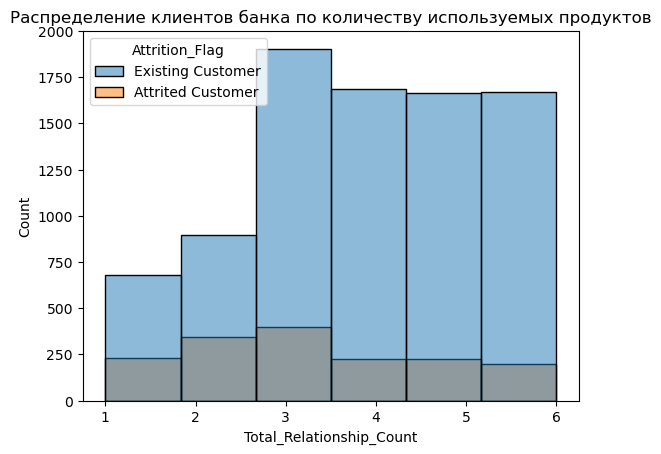

In [0]:
# распределение по количеству используемых продуктов банка
plt.title("Распределение клиентов банка по количеству используемых продуктов")
sns.histplot(num_data, x = 'Total_Relationship_Count', bins = 6, hue ='Attrition_Flag')

In [0]:
#Проверим средние значения
print('Среднее колличество продуктов у отказавшихся клиентов ', num_data.Total_Relationship_Count.values[attr_index].mean())
print('Ст. отклонение стажа обслуживания отказавшихся клиентов ', num_data.Total_Relationship_Count.values[attr_index].std())

print(trust_interval(num_data.Total_Relationship_Count.values))

Среднее колличество продуктов у отказавшихся клиентов  3.279655808236017
Ст. отклонение стажа обслуживания отказавшихся клиентов  1.577296787241246
Матожидание генеральной совокупности c вероятностью 95.0% находится в интервале от  3.7823039072100886 до 3.8428565549208487


На диаграмме разница в распределения подмножеств не наблюдается. В свою очередь анализ средних величин свидетельствут о том, что множество клиентов, отказавшихся от услуг в среднем пользуется меньшим числом продуктов банка. И это среднее значение лежит вне доверительного интервала общей совокупности клиентов банка

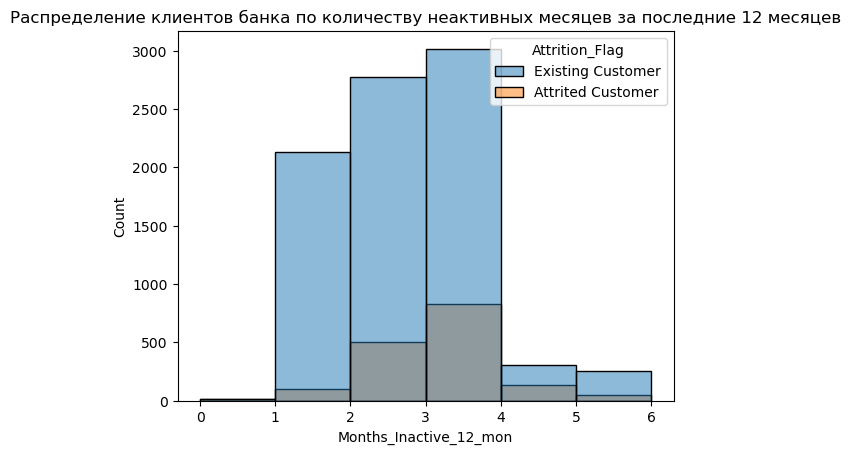

In [0]:
# распределение по количеству неактивных месяцев в 12 месячный период
plt.title("Распределение клиентов банка по количеству неактивных месяцев за последние 12 месяцев" )
sns.histplot(num_data, x = 'Months_Inactive_12_mon', bins = 6, hue ='Attrition_Flag')

In [0]:
#Проверим средние значения
print('Среднее колличество неактивных месяцев у отказавшихся клиентов ', num_data.Months_Inactive_12_mon.values[attr_index].mean())
print('Ст. отклонение стажа обслуживания отказавшихся клиентов ', num_data.Months_Inactive_12_mon.values[attr_index].std())

print(trust_interval(num_data.Months_Inactive_12_mon.values))

Среднее колличество неактивных месяцев у отказавшихся клиентов  2.693300553165335
Ст. отклонение стажа обслуживания отказавшихся клиентов  0.8993465414489379
Матожидание генеральной совокупности c вероятностью 95.0% находится в интервале от  2.321482554984379 до 2.3608517987235302


Среднее количество неактивных месяцев у отказавшихся клиентов в среднем больше чем у клиентов банка в целом. Данное среднее значение лежит вне границ доверительного интервала. Значит по этому признаку множество отказавшихся клиентов имеет статистичеки значимые отличия